In [1]:
import numpy as np
from scipy.spatial import ConvexHull,convex_hull_plot_2d
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Function, Eq, solve, I, collect, expand, simplify,\
                  Derivative, init_printing, series, evaluate, Poly

init_printing() # Для красивой печати

Nexpand=3
x,y = symbols("x y",real=True) # переменные по умолчанию
Y=symbols(f'y0:{Nexpand+2}')#Function('x')(eps)
epsilon=symbols('varepsilon')

Для малых $\varepsilon$ найти асимптотическое разложение каждого решения уравнения и определить равномерность найденной асимптотики для указанного интервала переменной.

а) $y^2 + (1 + \varepsilon - x)y - x = 0$, для $0 < x < 1$

In [2]:
eq = y**2 + (1 + epsilon - x)*y - x
eq_0 = sym.limit(eq,epsilon,0,'+')
y_01 = solve(eq_0, y)[0]
y_02 = solve(eq_0, y)[1]
print("Точное решение:")
print("1)y01=", y_01)
print("2)y02=", y_02)

Точное решение:
1)y01= -1
2)y02= x


In [3]:
Subsseries=sum(Y[i]*epsilon**i for i in range(Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res=series(collect(eq.subs(y,Subsseries).expand(),epsilon),epsilon,0,Nexpand).removeO() 
Res

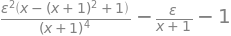

In [4]:
# Находим коэффициенты разложения первого корня
root1={Y[0]:y_01} 
Sys1=[Res.coeff(epsilon, i).subs(root1) for i in range(Nexpand)]
for i in range(1,Nexpand):
    root1[Y[i]] = solve(Sys1[i].subs(root1), Y[i])[0]
Subsseries = Subsseries.subs(root1)
Subsseries

Проверим разложение на равномерность:

In [5]:
solution1 = sym.solve(eq, y)[0]
solution1

In [6]:
a0 = Subsseries.coeff(epsilon, 0)*epsilon**0
sym.limit(sym.Abs(solution1 - a0)/sym.Abs(a0), epsilon, 0)

In [7]:
a1 = a0 + Subsseries.coeff(epsilon, 1)*epsilon**1
sym.limit(sym.Abs(solution1 - a1)/sym.Abs(a1), epsilon, 0)

In [8]:
a2 = a1 + Subsseries.coeff(epsilon, 2)*epsilon**2
sym.limit(sym.Abs(solution1 - a2)/sym.Abs(a2), epsilon, 0)

Асимпотическое разложение равномерно на $x \in (0,1)$

In [9]:
Subsseries1=sum(Y[i]*epsilon**i for i in range(Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res1=series(collect(eq.subs(y,Subsseries1).expand(),epsilon),epsilon,0,Nexpand).removeO() 
Res1

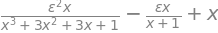

In [10]:
# Находим коэффициенты разложения второго корня
root2={Y[0]:y_02} 
Sys2=[Res1.coeff(epsilon, i).subs(root2) for i in range(Nexpand)]
for i in range(1,Nexpand):
    root2[Y[i]] = solve(Sys2[i].subs(root2), Y[i])[0]
Subsseries1 = Subsseries1.subs(root2)
Subsseries1

In [11]:
solution2 = sym.solve(eq, y)[1]
solution2

In [12]:
a10 = Subsseries1.coeff(epsilon, 0)*epsilon**0
sym.limit(sym.Abs(solution2 - a10)/sym.Abs(a10), epsilon, 0).simplify()

In [13]:
a11 = a10 + Subsseries.coeff(epsilon, 1)*epsilon**1
sym.limit(sym.Abs(solution2 - a11)/sym.Abs(a11), epsilon, 0).simplify()

In [14]:
a12 = a11 + Subsseries.coeff(epsilon, 2)*epsilon**2
sym.limit(sym.Abs(solution2 - a12)/sym.Abs(a12), epsilon, 0).simplify()

Асимпотическое разложение равномерно на $x \in (0,1)$